In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stock_data = pd.read_csv('constituents-financials.csv')
stock_data.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,52518668144,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6242377704,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,94550214268,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.810,8123611867,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,11191663795,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
# Summary Statistics
stock_data.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [6]:
# Check for null values
stock_data.isnull().sum()


Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

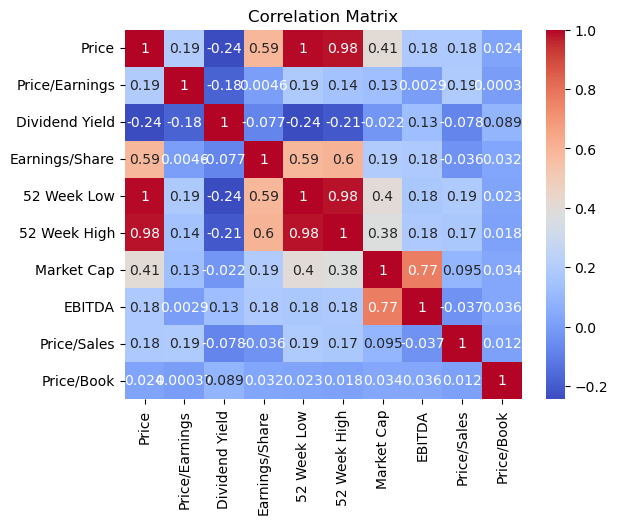

In [9]:
# Drop non-numeric columns
stock_data_numeric = stock_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = stock_data_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


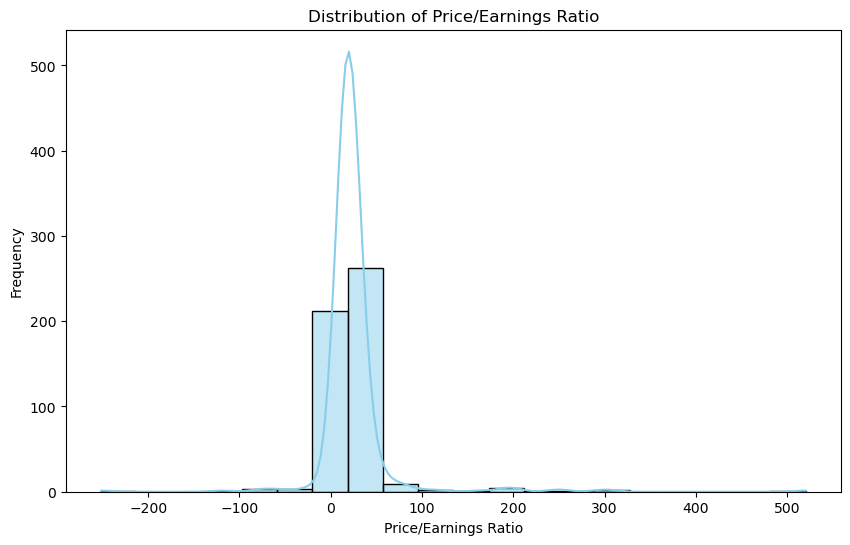

In [10]:
# Distribution of Price/Earnings Ratio
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Price/Earnings'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Price/Earnings Ratio')
plt.xlabel('Price/Earnings Ratio')
plt.ylabel('Frequency')
plt.show()

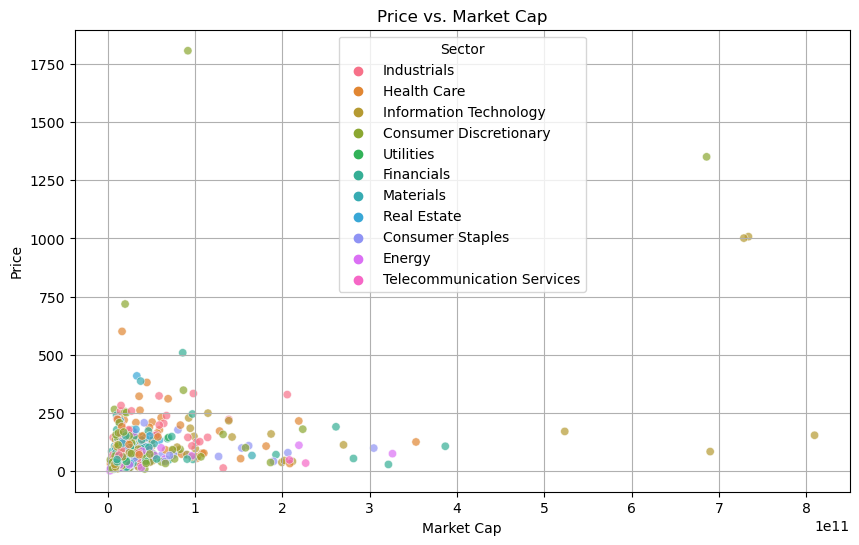

In [11]:
# Scatter plot of Price vs. Market Cap
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_data, x='Market Cap', y='Price', hue='Sector', alpha=0.7)
plt.title('Price vs. Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Price')
plt.legend(title='Sector')
plt.grid(True)
plt.show()

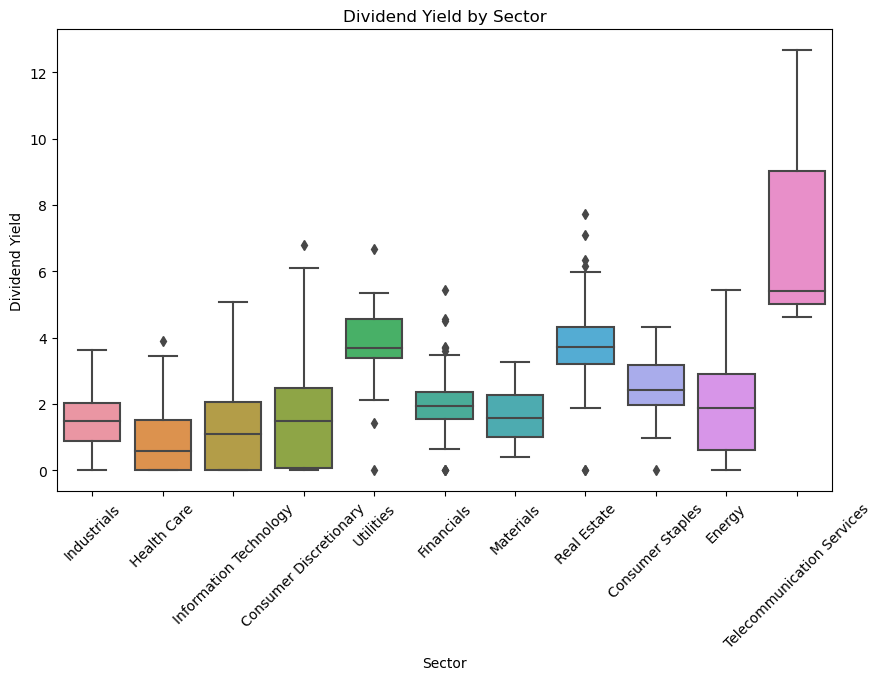

In [13]:
# Boxplot of Dividend Yield by Sector
plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_data, x='Sector', y='Dividend Yield')
plt.title('Dividend Yield by Sector')
plt.xlabel('Sector')
plt.ylabel('Dividend Yield')
plt.xticks(rotation=45)
plt.show()